### Second dataset

#### data preprocessing

In [205]:
import pandas as pd
import seaborn as sb

# df = pd.read_csv('/Users/sachacollinson/Downloads/fake_transactional_data_24.csv')
# df_NonNumeric_Mapping = pd.read_excel('/Users/sachacollinson/Downloads/Location_value_pairs.xlsx')
# df = pd.read_csv('/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/dsmp-2024-group-30/fake_transactional_data_24.csv', encoding='utf-8')
df_NonNumeric_Mapping = pd.read_excel('/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/dsmp-2024-group-30/Location_value_pairs.xlsx',sheet_name="seconddataset")
df_simulated_transaction_2024 = pd.read_csv("/Users/thanaparleelasathapornkun/Library/Mobile Documents/com~apple~CloudDocs/Term2/dsmp-2024-group-30/simulated_transaction_2024.csv", encoding='utf-8')

# df = df.rename(columns={"from_totally_fake_account": "AccountNumber", "monopoly_money_amount": "MoneyTransferAmount", "to_randomly_generated_account": "TransferredLocationAccount", "not_happened_yet_date": "TransactionDate"})
# from_totally_fake_account  = AccountNumber
# monopoly_money_amount = MoneyTransferAmount
# to_randomly_generated_account = TransferredLocationAccount
# not_happened_yet_date = TransactionDate
# df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format="%d/%m/%Y").dt.date
# df = df.sort_values(by=['TransactionDate'])



#### 1 dataset

In [206]:
# Check for null values in each column
null_status = df.isnull().any()
# Show all columns along with their null or not-null status
print("Column\t\tNull Status")
for column, status in null_status.items():
    print(f"{column}\t\t{status}")

Column		Null Status
AccountNumber		False
MoneyTransferAmount		False
TransferredLocationAccount		False
TransactionDate		False


#### 2 dataset

#### Add numeric and non-numeric

In [207]:

import pandas as pd
import numpy as np

# Define the custom function to merge columns
def merge_columns(row):
    # Empty value is represented by an empty string or NaN
    account = row['Third Party Account No'] if pd.notnull(row['Third Party Account No']) and row['Third Party Account No'] != ''  else ''
    name = row['Third Party Name'] if pd.notnull(row['Third Party Name']) and row['Third Party Name'] != '' else ''

    # Combine the non-empty values, and might adjust the logic and separator
    if account and name:
        return f"{account} - {name}"
    else:
        return account or name
# print(df_simulated_transaction_2024)
# Apply the function across rows
df_simulated_transaction_2024['Third Party Name Account'] = df_simulated_transaction_2024.apply(merge_columns, axis=1)


In [208]:
null_counts = df_simulated_transaction_2024.isnull().sum()
print(null_counts)

Date                           229
Timestamp                      251
Account No                     224
Balance                        246
Amount                         209
Third Party Account No      223764
Third Party Name              7079
Third Party Name Account         0
dtype: int64


####  remove missing data
####  Merge columns

In [209]:
print(df_simulated_transaction_2024.columns)
selected_columns = [0, 1, 2,3,4, 7] 
df_simulated_transaction_2024_subset = df_simulated_transaction_2024.iloc[:,selected_columns]
# print(df_simulated_transaction_2024_subset)
df_simulated_transaction_2024_subset = df_simulated_transaction_2024_subset.dropna()
null_counts = df_simulated_transaction_2024_subset.isnull().sum()
print(null_counts)

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name',
       'Third Party Name Account'],
      dtype='object')
Date                        0
Timestamp                   0
Account No                  0
Balance                     0
Amount                      0
Third Party Name Account    0
dtype: int64


#### Add 'Third Party Name cagtegory'

In [210]:
df_NonNumeric_Mapping['Third Party Name'] = df_NonNumeric_Mapping['Third Party Name'].str.strip()
mapping_dict = df_NonNumeric_Mapping.to_dict(orient='records')
mapped_dict = {entry['Third Party Name']: entry['Category'] for entry in mapping_dict}

# # Create a new column by mapping values from the 'key' column using the mapping dictionary
df_simulated_transaction_2024_subset['Third Party Name cagtegory'] = df_simulated_transaction_2024_subset['Third Party Name Account'].map(mapped_dict)

df_simulated_transaction_2024_subset['Third Party Name cagtegory'].fillna('Numeric', inplace=True)
# # Print the DataFrame with the new column
print(df_simulated_transaction_2024_subset)

              Date Timestamp   Account No       Balance   Amount  \
0       01/01/2023     00:00  678330503.0   2971.000000  1584.00   
1       01/01/2023     00:00  472213568.0   3792.000000  1950.00   
2       01/01/2023     00:00  472213568.0   3012.000000  -780.00   
3       01/01/2023     00:00  283027736.0   1787.000000   780.00   
4       01/01/2023     00:00  624500124.0   3226.000000  1825.00   
...            ...       ...          ...           ...      ...   
230591  06/12/2023     20:54  581655972.0  45935.206861   -41.06   
230592  06/12/2023     20:55  786141370.0   -244.837500   -62.35   
230593  06/12/2023     21:05  824916823.0   9709.172159   -32.94   
230594  06/12/2023     21:13  366550080.0  26834.165794   -19.25   
230595  06/12/2023     21:32  259015404.0   1145.349837   -37.64   

       Third Party Name Account Third Party Name cagtegory  
0            Westport Care Home                 healthcare  
1              Barbiee Boutique                   clothing  


/var/folders/__/6m3ls1tn1m5btytc8x1n4_j40000gn/T/ipykernel_9806/4082216576.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_simulated_transaction_2024_subset['Third Party Name cagtegory'].fillna('Numeric', inplace=True)


#### Add WillingnessToSpend

In [211]:
#find AVG money spend for each category for each customers
avg_spend = df_simulated_transaction_2024_subset.groupby(['Account No', 'Third Party Name cagtegory'])['Amount'].mean().reset_index()

#Identifying the category with the highest average spend for each customer
AccountNumber_highestAvgSpend_df = avg_spend.loc[avg_spend.groupby('Account No')['Amount'].idxmax()]

#Create a new column by mapping values from the 'key' column using the mapping dictionary
# mapped_dict_lovers = {entry['Value']: entry['Main_Category'] for entry in mapping_dict}
# mapped_dict_lovers['Numeric'] = 'Numeric'

subset_tmp = AccountNumber_highestAvgSpend_df[['Account No','Third Party Name cagtegory']]
subset_tmp = subset_tmp.rename(columns={"Third Party Name cagtegory": "WillingnessToSpend"})
# print(subset_tmp)
# AccountNumber_highestAvgSpend_df['WillingnessToSpend'] = AccountNumber_highestAvgSpend_df['CategoryTransferredLocationAccount'].map(subset_tmp)
df_simulated_transaction_2024_subset = pd.merge(df_simulated_transaction_2024_subset, subset_tmp[['Account No','WillingnessToSpend']], on='Account No', how='left')
print(df_simulated_transaction_2024_subset.head())

         Date Timestamp   Account No  Balance  Amount  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0   
3  01/01/2023     00:00  283027736.0   1787.0   780.0   
4  01/01/2023     00:00  624500124.0   3226.0  1825.0   

  Third Party Name Account Third Party Name cagtegory WillingnessToSpend  
0       Westport Care Home                 healthcare         healthcare  
1         Barbiee Boutique                   clothing           clothing  
2              283027736.0                    Numeric           clothing  
3              472213568.0                    Numeric            Numeric  
4                 Fat Face                   clothing           clothing  


In [212]:
# df_simulated_transaction_2024['Column_type'] = df_simulated_transaction_2024.apply(lambda row: 'numeric' if pd.notnull(row['Third Party Account No']) and row['Third Party Account No'] != '' else 'non-numeric', axis=1)
# print(df_simulated_transaction_2024[df_simulated_transaction_2024['Column_type'] == None])

df_Transferred_Numeric = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Third Party Name Account'].apply(lambda x: isinstance(x, (int, float)) ==True )].copy()
df_Transferred_Non_Numeric = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Third Party Name Account'].apply(lambda x: isinstance(x, (str)) ==True)].copy()

In [213]:
# Separate the dataset into two based on the Amount
outgoing_payments = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Amount'] < 0]
incoming_payments = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Amount'] > 0]

# Display the first few rows of each dataset to confirm
(outgoing_payments.head(), incoming_payments.head())


(          Date Timestamp   Account No  Balance  Amount  \
 2   01/01/2023     00:00  472213568.0   3012.0  -780.0   
 7   01/01/2023     00:00  768271776.0   2840.0  -780.0   
 11  01/01/2023     00:00  350921975.0   1998.5  -460.0   
 13  01/01/2023     00:00  455831435.0   2603.1  -650.0   
 18  01/01/2023     00:00  172084472.0   1149.0 -1300.0   
 
    Third Party Name Account Third Party Name cagtegory WillingnessToSpend  
 2               283027736.0                    Numeric           clothing  
 7               215404070.0                    Numeric             barber  
 11              633362865.0                    Numeric                art  
 13              442079728.0                    Numeric             coffee  
 18              407574996.0                    Numeric         healthcare  ,
          Date Timestamp   Account No  Balance   Amount  \
 0  01/01/2023     00:00  678330503.0  2971.00  1584.00   
 1  01/01/2023     00:00  472213568.0  3792.00  1950.00   
 3  

In [214]:
# Add a new column showing the quarter for each date
df_simulated_transaction_2024_subset['Date'] = pd.to_datetime(df_simulated_transaction_2024_subset['Date'], format='%d/%m/%Y')
df_simulated_transaction_2024_subset['Date_quarter'] = df_simulated_transaction_2024_subset['Date'].dt.quarter

print(df_simulated_transaction_2024_subset)

             Date Timestamp   Account No       Balance   Amount  \
0      2023-01-01     00:00  678330503.0   2971.000000  1584.00   
1      2023-01-01     00:00  472213568.0   3792.000000  1950.00   
2      2023-01-01     00:00  472213568.0   3012.000000  -780.00   
3      2023-01-01     00:00  283027736.0   1787.000000   780.00   
4      2023-01-01     00:00  624500124.0   3226.000000  1825.00   
...           ...       ...          ...           ...      ...   
229434 2023-12-06     20:54  581655972.0  45935.206861   -41.06   
229435 2023-12-06     20:55  786141370.0   -244.837500   -62.35   
229436 2023-12-06     21:05  824916823.0   9709.172159   -32.94   
229437 2023-12-06     21:13  366550080.0  26834.165794   -19.25   
229438 2023-12-06     21:32  259015404.0   1145.349837   -37.64   

       Third Party Name Account Third Party Name cagtegory WillingnessToSpend  \
0            Westport Care Home                 healthcare         healthcare   
1              Barbiee Boutique  

#### Add columns

In [215]:
print(df_NonNumeric_Mapping)

     Third Party Name      Category  Mean_Category
0   Brilliant Brushes           art            NaN
1          Craftastic           art            NaN
2            Cass Art           art            NaN
3        A Yarn Story           art            NaN
4           The Works           art            NaN
..                ...           ...            ...
77               Head         sport            NaN
78             Disney  subscription            NaN
79            Netflix  subscription            NaN
80             Amazon  subscription            NaN
81               Etsy  subscription            NaN

[82 rows x 3 columns]


##### df_Transferred_Numeric
##### df_Transferred_Non_Numeric
##### outgoing_payments
##### incoming_payments


### Data model with K-fold validation

In [216]:
#df_simulated_transaction_2024_subset
#df_Transferred_Numeric
#df_Transferred_Non_Numeric
#outgoing_payments
#incoming_payments

#'Date', 'Timestamp', 'Account No', 'Balance', 'Amount', 'Merged Column'],


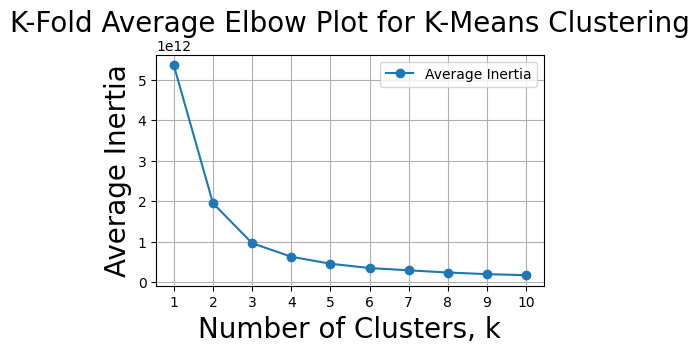

                                 Balance     Amount
clusterBalance and Amount3                         
0                            7987.247365  54.178139
1                           20927.028781  78.220073
2                            1007.919736 -13.823851


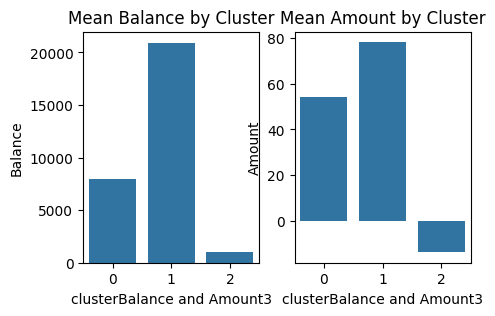

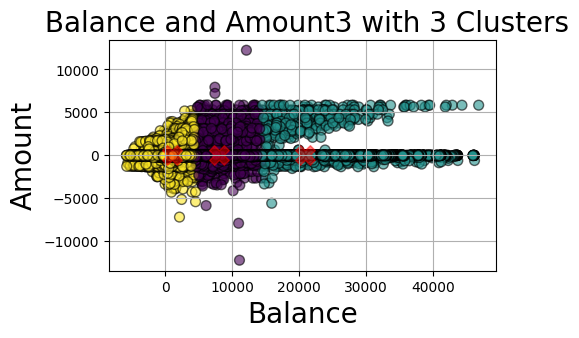

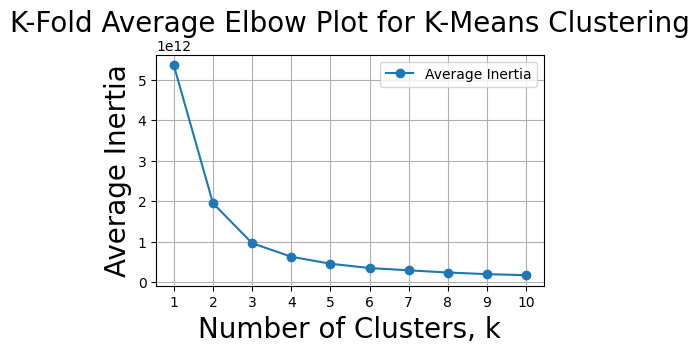

                                 Balance     Amount
clusterBalance and Amount2                         
0                            1766.388597  -3.974821
1                           13691.695903  64.079634


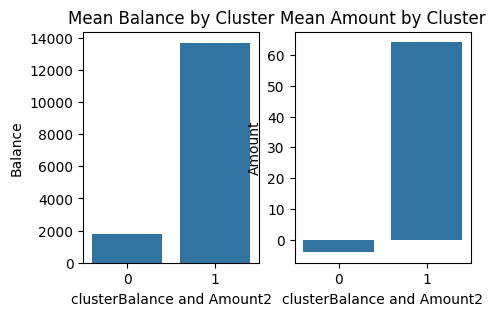

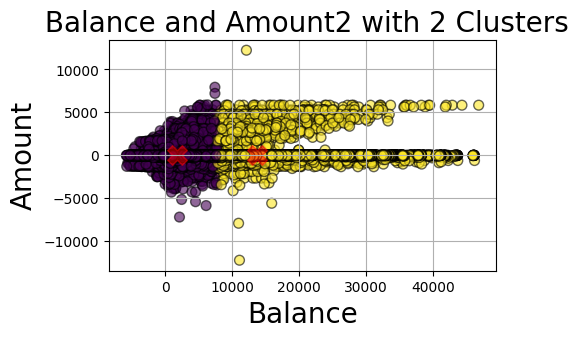

In [217]:
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def kmeans_kfold_elbow_with_columns_and_plot_clusters(df, columns, n_splits=5, max_clusters=10, plot_columns=[0, 1],txt="",optimal_clustern=3):
    X = df[columns].values  # Extracting the specified columns from the DataFrame
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_inertias = np.zeros(max_clusters)
    
    # Perform K-Fold cross-validation
    for train_index, _ in kf.split(X):
        X_train = X[train_index]
        inertias = []
        
        for k in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(X_train)
            inertias.append(kmeans.inertia_)
        
        avg_inertias += np.array(inertias)
    
    avg_inertias /= n_splits

    
    # Calculate the second derivative of the inertia to find the elbow point
    # second_derivative = [avg_inertias[i] - 2 * avg_inertias[i + 1] + avg_inertias[i + 2] for i in range(len(avg_inertias) - 2)]
    # elbow_point = second_derivative.index(max(second_derivative)) + 2
    
    # Plotting the average elbow plot
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, max_clusters + 1), avg_inertias, '-o', label='Average Inertia')
    
    plt.xlabel('Number of Clusters, k', fontsize=20)
    plt.ylabel('Average Inertia', fontsize=20)
    plt.title('K-Fold Average Elbow Plot for K-Means Clustering', fontsize=20)
    plt.xticks(range(1, max_clusters + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    optimal_cluster = optimal_clustern
    # Retrain model using the entire dataset with the optimal number of clusters
    model = KMeans(n_clusters=optimal_cluster, random_state=42)
    df['cluster'+str(txt)] = model.fit_predict(X)

    # penguins_grouped = df.groupby('species').agg({columns[plot_columns[0]]: ['mean'], columns[plot_columns[1]]: ['mean']}).reset_index()
    # penguins_grouped.columns = ['species', columns[plot_columns[0]], columns[plot_columns[1]]]

    cluster_means = df.groupby('cluster'+str(txt))[[columns[plot_columns[0]], columns[plot_columns[1]]]].mean()
    print(cluster_means)
    # Visualizing cluster characteristics
    fig, axes = plt.subplots(1, 2, figsize=(5, 3))

    sns.barplot(x=cluster_means.index, y=columns[plot_columns[0]], data=cluster_means, ax=axes[0])
    axes[0].set_title('Mean '+str(columns[plot_columns[0]])+' by Cluster')

    sns.barplot(x=cluster_means.index, y=columns[plot_columns[1]], data=cluster_means, ax=axes[1])
    axes[1].set_title('Mean '+str(columns[plot_columns[1]])+' by Cluster')

    plt.show()

    # Plotting the clusters
    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, plot_columns[0]], X[:, plot_columns[1]], c=model.labels_, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
    
    # Plotting the centroids
    centers = model.cluster_centers_
    plt.scatter(centers[:, plot_columns[0]], centers[:, plot_columns[1]], c='red', s=200, alpha=0.5, marker='X')
    plt.xlabel(columns[plot_columns[0]], fontsize=20)
    plt.ylabel(columns[plot_columns[1]], fontsize=20)
    plt.title(' '+str(txt)+f' with {optimal_cluster} Clusters', fontsize=20)
    plt.grid(True)
    plt.show()


    
    return model,df


selected_columns =  ['Balance', 'Amount'] 
optimal_model,dff_cluster3 = kmeans_kfold_elbow_with_columns_and_plot_clusters(df_simulated_transaction_2024_subset, selected_columns, max_clusters=10, plot_columns=[0, 1],txt="Balance and Amount3",optimal_clustern=3)

selected_columns =  ['Balance', 'Amount'] 
optimal_model,dff_cluster2 = kmeans_kfold_elbow_with_columns_and_plot_clusters(df_simulated_transaction_2024_subset, selected_columns, max_clusters=10, plot_columns=[0, 1],txt="Balance and Amount2",optimal_clustern=2)



#df_simulated_transaction_2024_subset
#df_Transferred_Numeric
#df_Transferred_Non_Numeric
#outgoing_payments
#incoming_payments

#'Date', 'Timestamp', 'Account No', 'Balance', 'Amount', 'Merged Column'],





In [218]:
print(dff_cluster3)

             Date Timestamp   Account No       Balance   Amount  \
0      2023-01-01     00:00  678330503.0   2971.000000  1584.00   
1      2023-01-01     00:00  472213568.0   3792.000000  1950.00   
2      2023-01-01     00:00  472213568.0   3012.000000  -780.00   
3      2023-01-01     00:00  283027736.0   1787.000000   780.00   
4      2023-01-01     00:00  624500124.0   3226.000000  1825.00   
...           ...       ...          ...           ...      ...   
229434 2023-12-06     20:54  581655972.0  45935.206861   -41.06   
229435 2023-12-06     20:55  786141370.0   -244.837500   -62.35   
229436 2023-12-06     21:05  824916823.0   9709.172159   -32.94   
229437 2023-12-06     21:13  366550080.0  26834.165794   -19.25   
229438 2023-12-06     21:32  259015404.0   1145.349837   -37.64   

       Third Party Name Account Third Party Name cagtegory WillingnessToSpend  \
0            Westport Care Home                 healthcare         healthcare   
1              Barbiee Boutique  

In [219]:
print(dff_cluster2)

             Date Timestamp   Account No       Balance   Amount  \
0      2023-01-01     00:00  678330503.0   2971.000000  1584.00   
1      2023-01-01     00:00  472213568.0   3792.000000  1950.00   
2      2023-01-01     00:00  472213568.0   3012.000000  -780.00   
3      2023-01-01     00:00  283027736.0   1787.000000   780.00   
4      2023-01-01     00:00  624500124.0   3226.000000  1825.00   
...           ...       ...          ...           ...      ...   
229434 2023-12-06     20:54  581655972.0  45935.206861   -41.06   
229435 2023-12-06     20:55  786141370.0   -244.837500   -62.35   
229436 2023-12-06     21:05  824916823.0   9709.172159   -32.94   
229437 2023-12-06     21:13  366550080.0  26834.165794   -19.25   
229438 2023-12-06     21:32  259015404.0   1145.349837   -37.64   

       Third Party Name Account Third Party Name cagtegory WillingnessToSpend  \
0            Westport Care Home                 healthcare         healthcare   
1              Barbiee Boutique  

#### See the category distribution in each features

Cluster 0
Cluster 1
Cluster 2


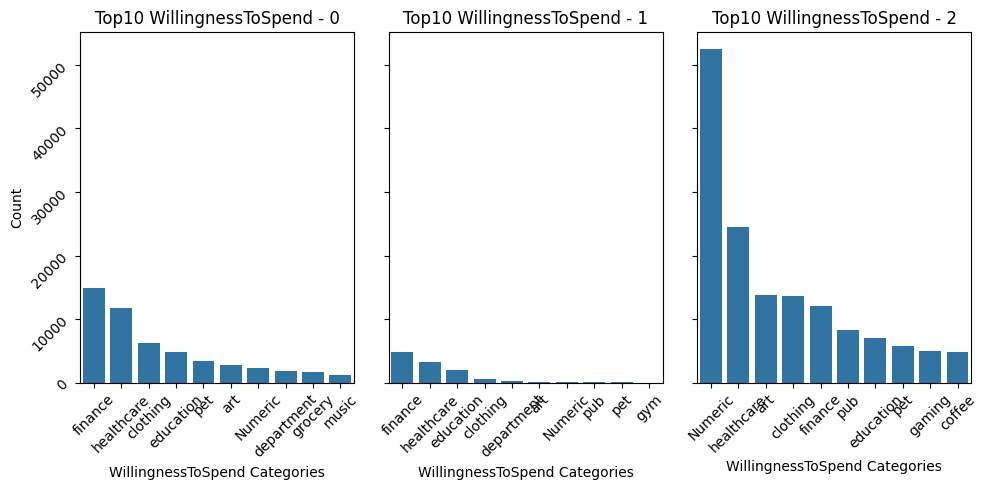

Cluster 0
Cluster 1
Cluster 2


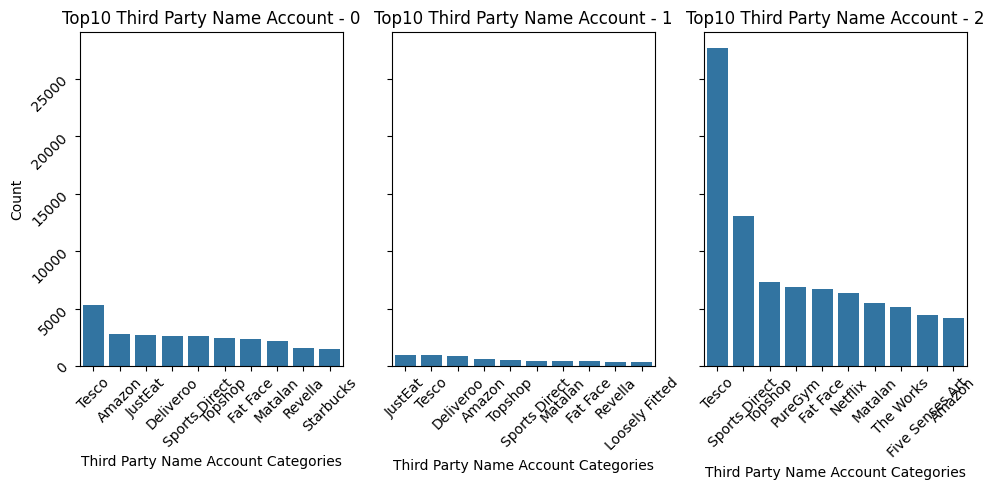

In [254]:

def show_clusters(clustername,feature1,clustern):
    clustern = 3
    num = 0

    fig, axes = plt.subplots(1, clustern, figsize=(10, 5), sharey=True)  # Prepare subplots # Sharey to have the same y-axis scale for comparison
    axes = axes.flatten() 

    for j in range(clustern):
        cluster1 = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset[clustername] == j]
        print("Cluster "+str(j))
        # print(cluster1[feature1].nunique())
        # print(cluster1[feature2].unique())
        # print(cluster1[feature3].nunique())
        # Step 2: Count the occurrences of each category in 'WillingnessToSpend'
        top_categories = cluster1[feature1].value_counts().head(10).index

        # # Step 3: Filter the DataFrame again to keep only the top 10 categories
        top_categories_df = cluster1[cluster1[feature1].isin(top_categories)]

        # Plot histogram for "Balance" with clusters differentiated by hue
        sns.countplot(data=top_categories_df, x=feature1, order=top_categories_df[feature1].value_counts().index, ax=axes[j])
        axes[j].set_title('Top10 ' + str(feature1) + ' - ' + str(j))
        axes[j].tick_params( rotation=45)
        axes[j].set_ylabel('Count')
        axes[j].set_xlabel(str(feature1) + ' Categories')


    plt.tight_layout()
    plt.show()

show_clusters('clusterBalance and Amount3','WillingnessToSpend',3)
show_clusters('clusterBalance and Amount3','Third Party Name Account',3)
#,'Third Party Name Account','Third Party Name cagtegory','Date_quarter'

/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/thanaparleelasat

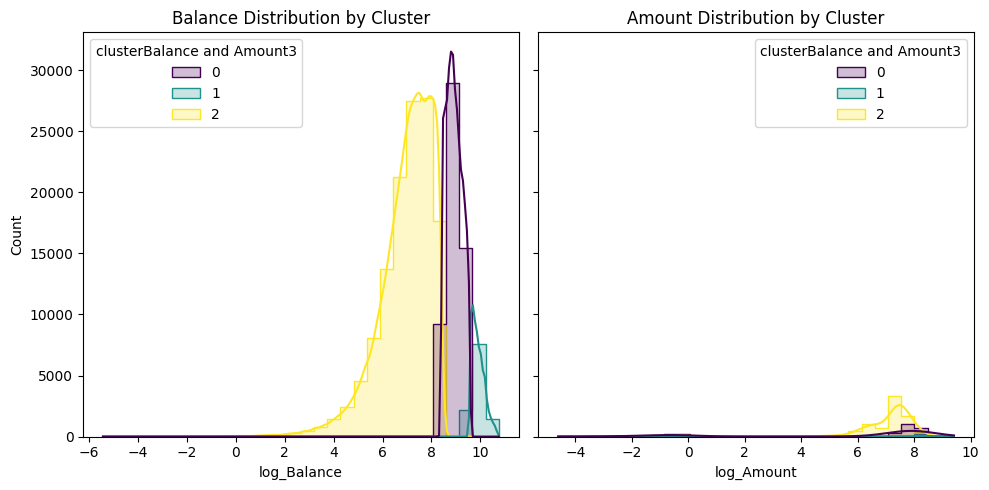

/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/thanaparleelasathapornkun/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pand

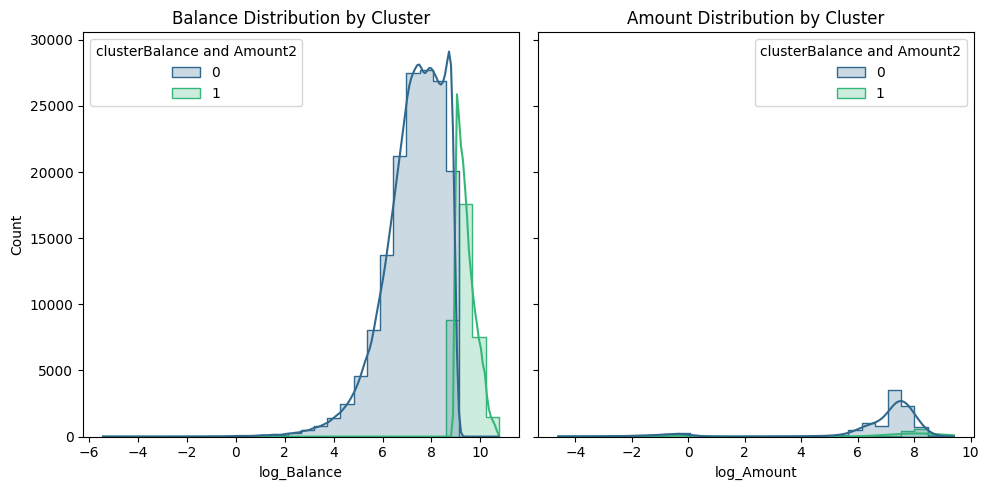

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dff_cluster3' is your DataFrame, and it has a 'cluster' column indicating the cluster number
# and 'Balance' and 'Amount' are the columns for which you want to plot histograms.
def plothistrogram(dfff,feature1,feature2,hue):
    dfff['log_'+str(feature1)] = np.log1p(dfff[feature1])
    dfff['log_'+str(feature2)] = np.log1p(dfff[feature2])
    # Set up the plotting area
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)  # Sharey to have the same y-axis scale for comparison

    # Plot histogram for "Balance" with clusters differentiated by hue
    sns.histplot(data=dfff, x='log_'+str(feature1), hue=hue, ax=axes[0], kde=True, bins=30, palette='viridis', element='step', common_norm=False)
    axes[0].set_title('Balance Distribution by Cluster')

    # Plot histogram for "Amount" with clusters differentiated by hue
    sns.histplot(data=dfff, x='log_'+str(feature2), hue=hue, ax=axes[1], kde=True, bins=30, palette='viridis', element='step', common_norm=False)
    axes[1].set_title('Amount Distribution by Cluster')

    plt.tight_layout()
    plt.show()

plothistrogram(dff_cluster3,'Balance','Amount','clusterBalance and Amount3')
plothistrogram(dff_cluster2,'Balance','Amount','clusterBalance and Amount2')



#### all details in each cluster

#### OLD

In [222]:
##First datasets
# AccountNumber		False
# MoneyTransferAmount		False
# TransferredLocationAccount		False
# TransactionDate		False

# No null value
# separate into numeric and non-numeric TransferredLocationAccount


##second datasets
# Date		True # 1 - 365 days ??? 
# Timestamp		True # separate into 4 cagtegories
# Account No		True
# Balance		True
# Amount		True
# Third Party Account No		True
# Third Party Name


In [223]:
# tmp = df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Column_type'] == 'non-numeric']
# print(len(tmp))
# print(len(df_simulated_transaction_2024_subset[df_simulated_transaction_2024_subset['Column_type'] == 'numeric']))
# print(len(df_Transferred_Numeric ))
# print(len(df_Transferred_Non_Numeric))

In [224]:
# df_simulated_transaction_2024

# import numpy as np
# print(df_simulated_transaction_2024.columns)
# # print(df_simulated_transaction_2024.value_counts) 
# print("total: "+str(len(df_simulated_transaction_2024)))
# Transferred_AccountNo_Null = df_simulated_transaction_2024[df_simulated_transaction_2024.isnull()['Third Party Account No'] == False]
# Transferred_Location_Null = df_simulated_transaction_2024[df_simulated_transaction_2024.isnull()['Third Party Name'] == False]
# Transferred_Both_AccNo_Location_Null = df_simulated_transaction_2024[(df_simulated_transaction_2024.isnull()['Third Party Account No'] == False) & (df_simulated_transaction_2024.isnull()['Third Party Name'] == False)]
# # Transferred_either_AccNo_Location_Null = df_simulated_transaction_2024[(df_simulated_transaction_2024.isnull()['Third Party Account No'] == False) | (df_simulated_transaction_2024.isnull()['Third Party Name'] == False)]
# print("Transferred_AccountNo_Null total: "+str(len(Transferred_AccountNo_Null)))
# print("Transferred_Location_Null total: "+str(len(Transferred_Location_Null)))
# print("Transferred_Both_AccNo_Location_Null total: "+str(len(Transferred_Both_AccNo_Location_Null)))
# # print("Transferred_either_AccNo_Location_Null total: "+str(len(Transferred_either_AccNo_Location_Null)))
# print(Transferred_AccountNo_Null.head())
# # 230,349
 


In [225]:
# df_simulated_transaction_2024['Column_type'] = df_simulated_transaction_2024.apply(lambda row: 'numeric' if pd.notnull(row['Third Party Account No']) and row['Third Party Account No'] != '' else 'non-numeric', axis=1)
# print(df_simulated_transaction_2024[df_simulated_transaction_2024['Column_type'] == None])

# df_Transferred_numeric = df_simulated_transaction_2024[df_simulated_transaction_2024['Third Party Account No'].apply(lambda x: str(x).isnumeric())].copy()
# df_Transferred_Non_Numeric = df_simulated_transaction_2024[df_simulated_transaction_2024['TransferredLocationAccount'].apply(lambda x: str(x).isnumeric()==False)].copy()
